# Group Project For ASTR 19

In [102]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt

In [103]:
seed = 42
np.random.seed(42)

In [104]:
data = ascii.read('Data/UID_0043587_RVC_008.tbl.txt')
data

HJD,Radial_Velocity,Radial_Velocity_Uncertainty
days,m / s,m / s
float64,float64,float64
2449676.0632,131.910003662,4.8400002
2449767.77441,22.6000003815,2.5699999
2449768.83203,-5.48999977112,2.6800001
2449793.79785,107.309997559,1.52
2450056.98828,116.669998169,1.6199999
2450087.88184,77.2600021362,2.1600001
2450088.91894,32.5999984741,1.64
2450089.00586,33.7299995422,1.5599999


In [105]:
print(data.columns)
print(data.colnames)
print(data.meta)
print(len(data))

<TableColumns names=('HJD','Radial_Velocity','Radial_Velocity_Uncertainty')>
['HJD', 'Radial_Velocity', 'Radial_Velocity_Uncertainty']
OrderedDict([('comments', []), ('keywords', OrderedDict([('STAR_ID', {'value': 'HD 75732'}), ('DATA_CATEGORY', {'value': 'Planet Radial Velocity Curve'}), ('NUMBER_OF_POINTS', {'value': '274'}), ('TIME_REFERENCE_FRAME', {'value': 'HJD'}), ('MINIMUM_DATE', {'value': '2449676.0632'}), ('DATE_UNITS', {'value': 'days'}), ('MAXIMUM_DATE', {'value': '2455603.80404'}), ('MINIMUM_VALUE', {'value': '-130.570007324'}), ('VALUE_UNITS', {'value': 'm/s'}), ('MAXIMUM_VALUE', {'value': '141.460006714'}), ('REFERENCE', {'value': 'Howard & Fulton, 2016'}), ('BIBCODE', {'value': '2016arXiv160603134H'}), ('TELESCOPE', {'value': '3.0m Shane'}), ('INSTRUMENT', {'value': 'l: Hamilton Spectrograph post-dewar 16 (after November 1994)'}), ('WAVELENGTH_CALIBRATION_TECHNIQUE', {'value': 'Iodine'}), ('OBSERVATORY_SITE', {'value': 'Lick Observatory, California'}), ('COLUMN_RADIAL_V

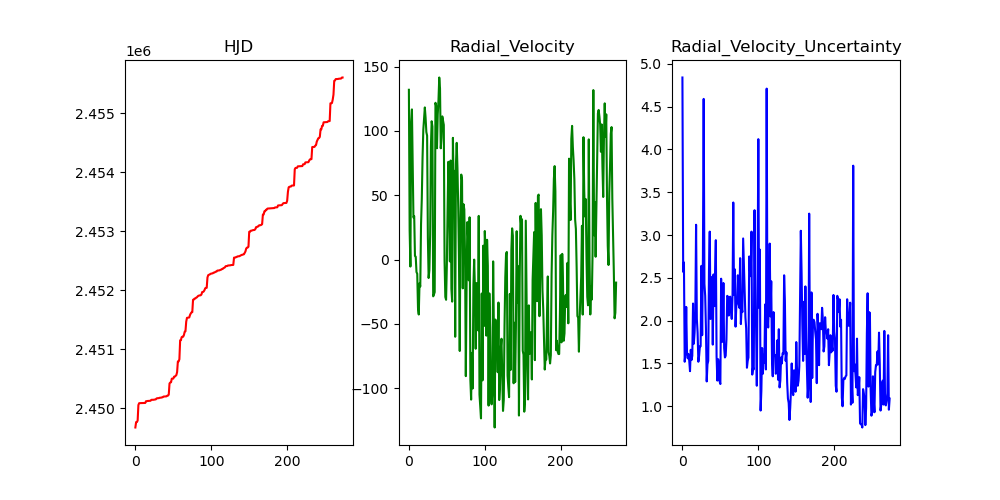

In [106]:
fig, ax = plt.subplots(1,3, figsize=(10, 5))

# define x based on number of rows
x = range(len(data))

color = ["r", "g", "b"]

for i in range(len(data.columns)):
    ax[i].plot(x, data.columns[i], c=color[i])
    ax[i].set_title(f'{data.colnames[i]}')

fig.savefig("data.pdf")
plt.show()

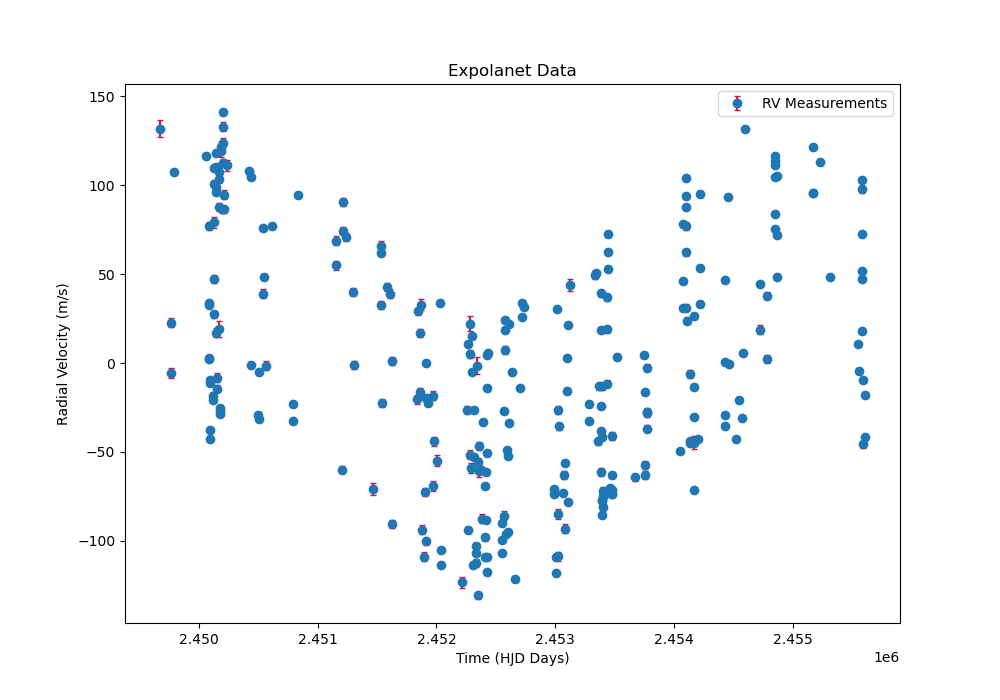

In [107]:
hjd = data.columns["HJD"]
radial_velocity = data.columns["Radial_Velocity"]
uncertainty = data.columns["Radial_Velocity_Uncertainty"]

plt.figure(figsize=(10, 7))
plt.errorbar(x=hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")

plt.title("Expolanet Data")
plt.xlabel("Time (HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()

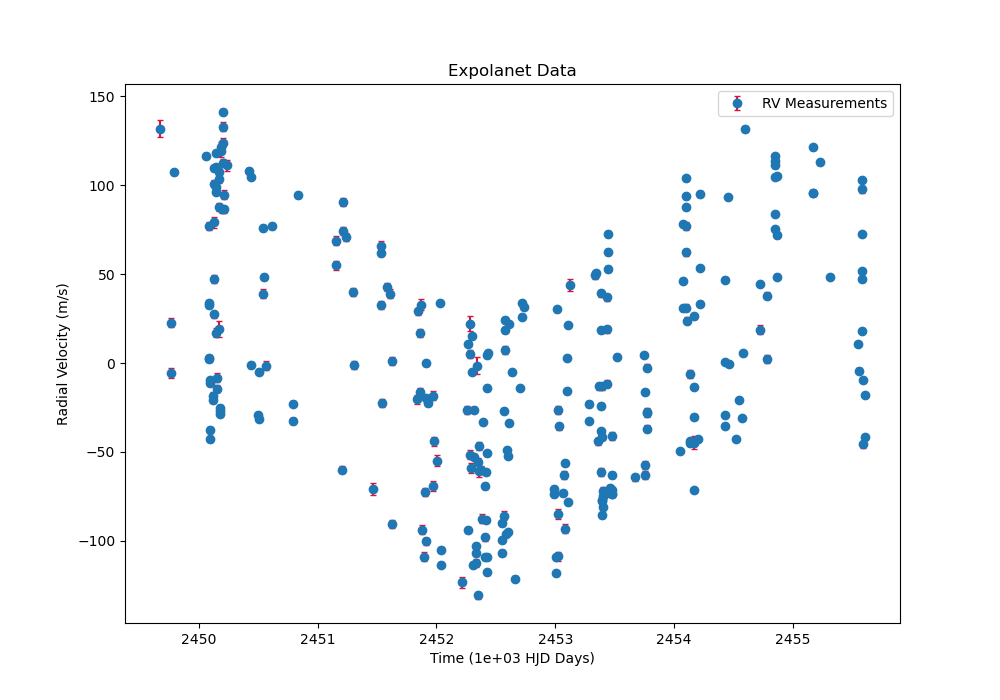

In [108]:
hjd = data.columns["HJD"]
radial_velocity = data.columns["Radial_Velocity"]
uncertainty = data.columns["Radial_Velocity_Uncertainty"]

scalar = 1e3
scaled_hjd = hjd / scalar

plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")

plt.title("Expolanet Data")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()

In [109]:
import numpy as np
from scipy import optimize

Fitted params: [-47.91804209  91.26667119   4.8069813   -1.41826476]


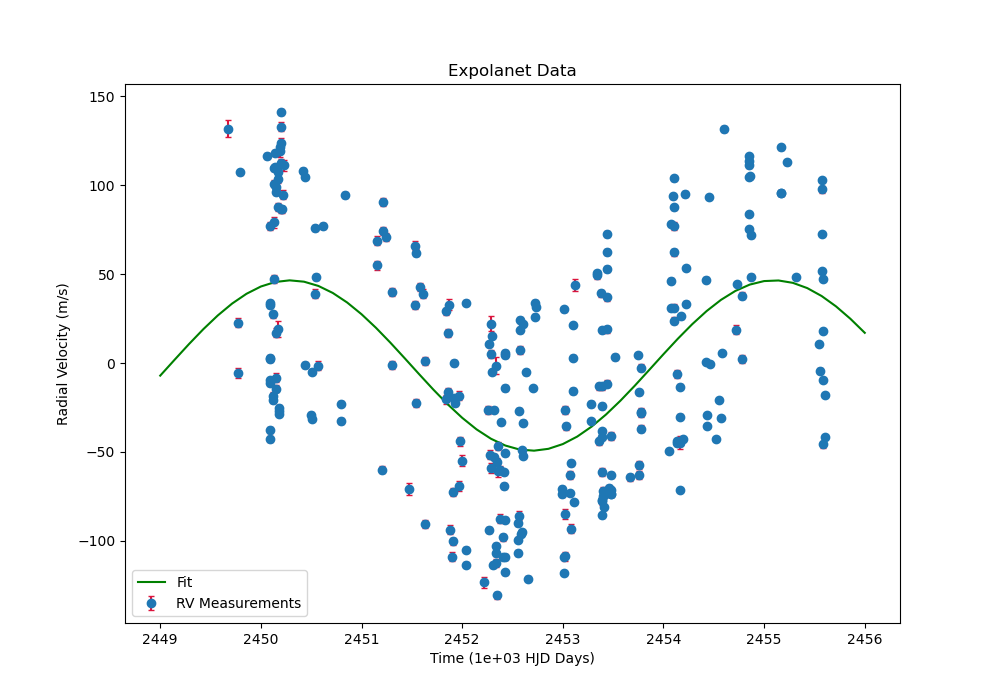

In [110]:
# define the model function we are trying to fit
# a: amplitude
# b: phase shift
# c: wavelength/period
# d: vertical shift
def f_curve(x, a, b, c, d):
    return a * np.sin(2.0*np.pi * (x - b) / c) + d

initial_guess = [5, 1, 5, 0]

# we can help scipy find the best fit value by providing the initial guess ourselves
# this worked but the parameters are not quite those expected
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, radial_velocity, sigma = uncertainty, absolute_sigma=True,
                                        p0=initial_guess)


# # in particularly difficult cases we can also provide boundaries to explore parameter ranges
# initial_guess = [3,1,2,-1]
# lower_bound = [3,1,2,-2]
# upper_bound = [4,2,3,-1]
# params, params_cov = optimize.curve_fit(f_curve, x, y, sigma = y_err, absolute_sigma=True,
#             p0 = initial_guess,
#             bounds = (lower_bound, upper_bound))


print(f"Fitted params: {params}")

# lets see how the best fit model looks by plotting it along with the data

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)))
y_fit = f_curve(x_fit, *params)     # providing '*params' is called unpacking and is identical to write
                                    # 'params[0], params[1], params[2]...'

plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()

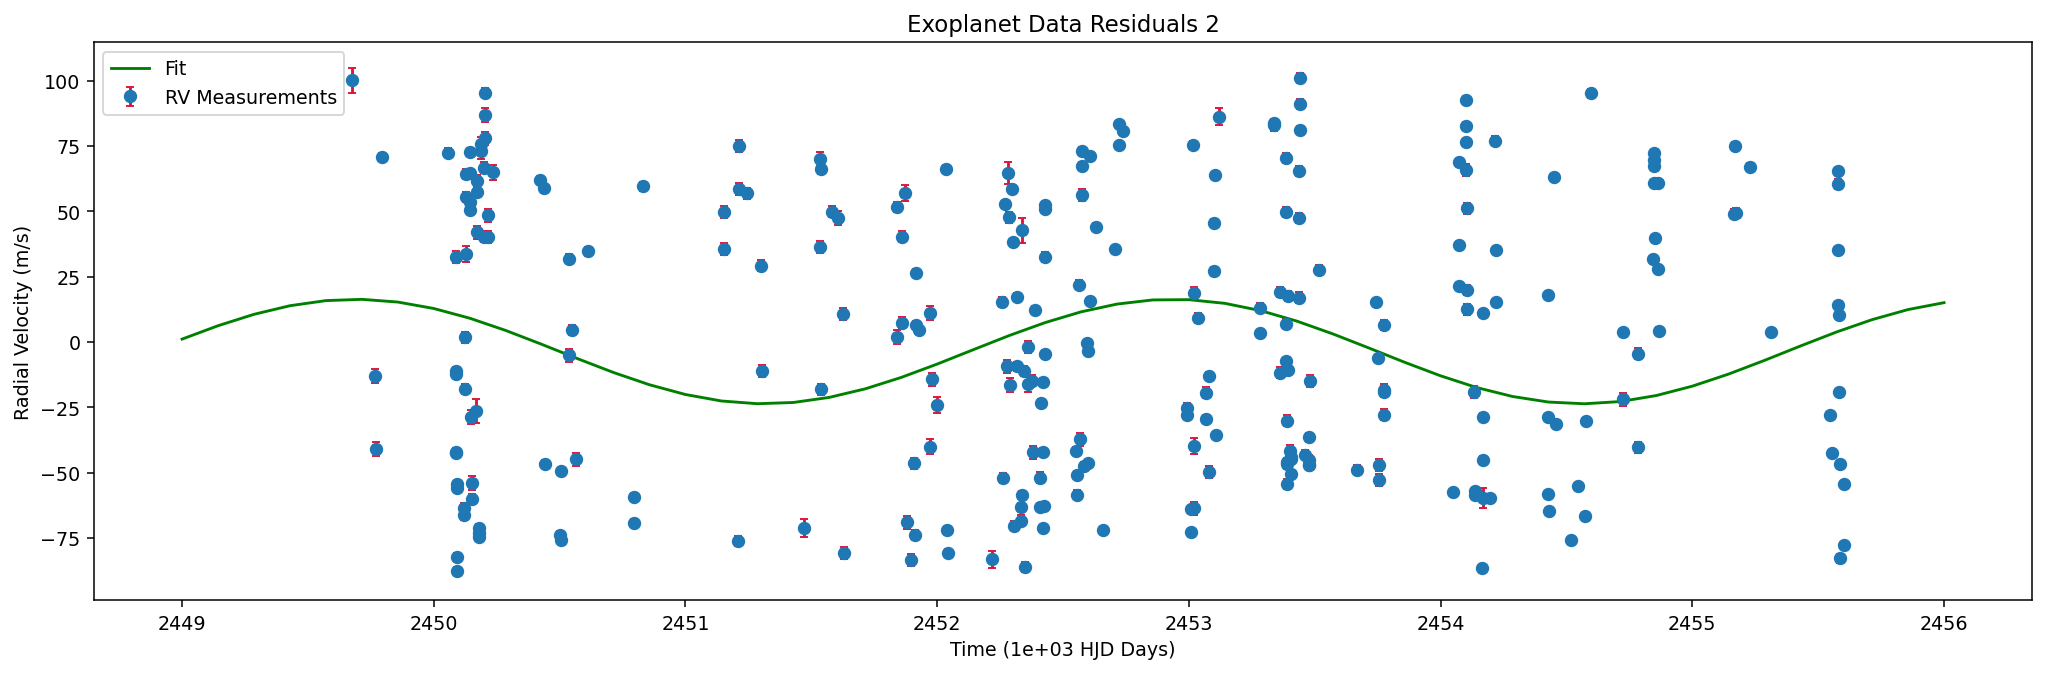

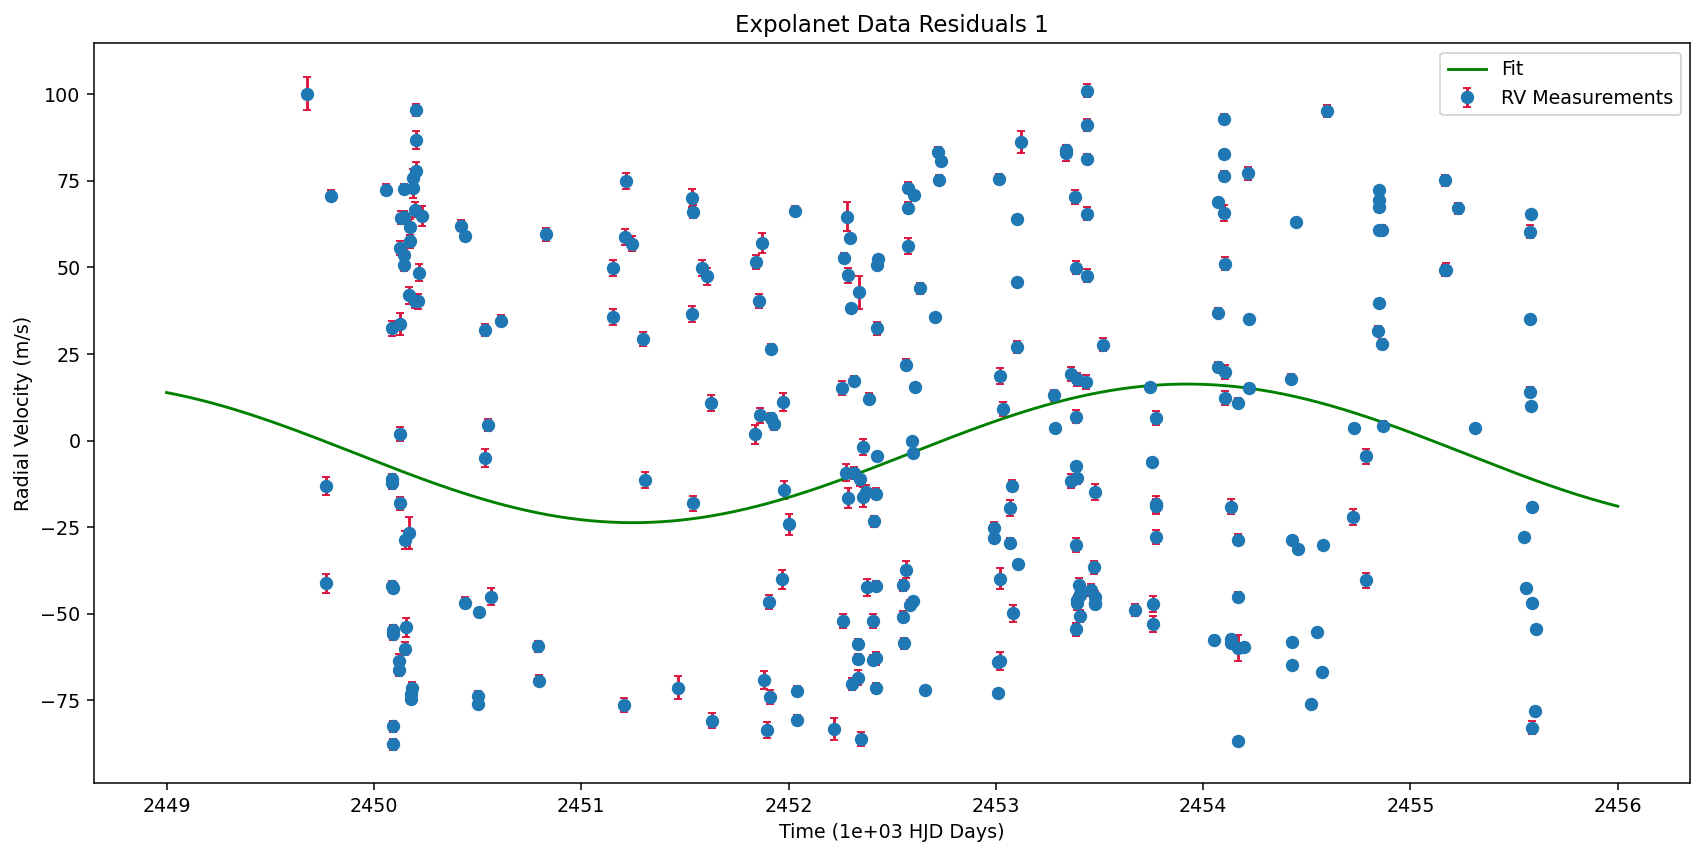

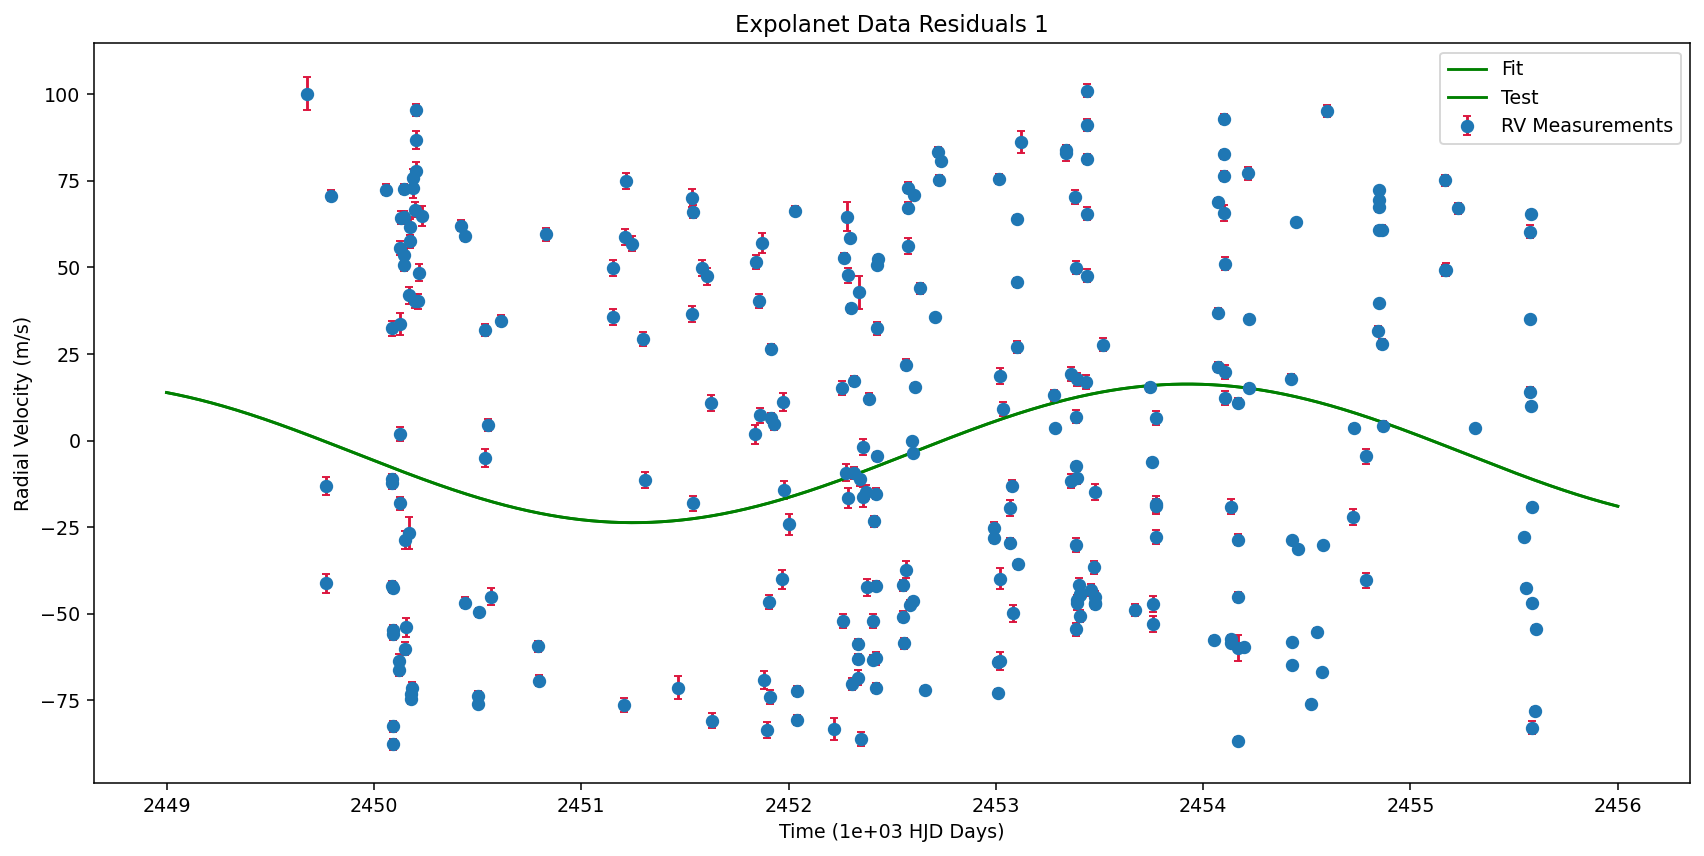

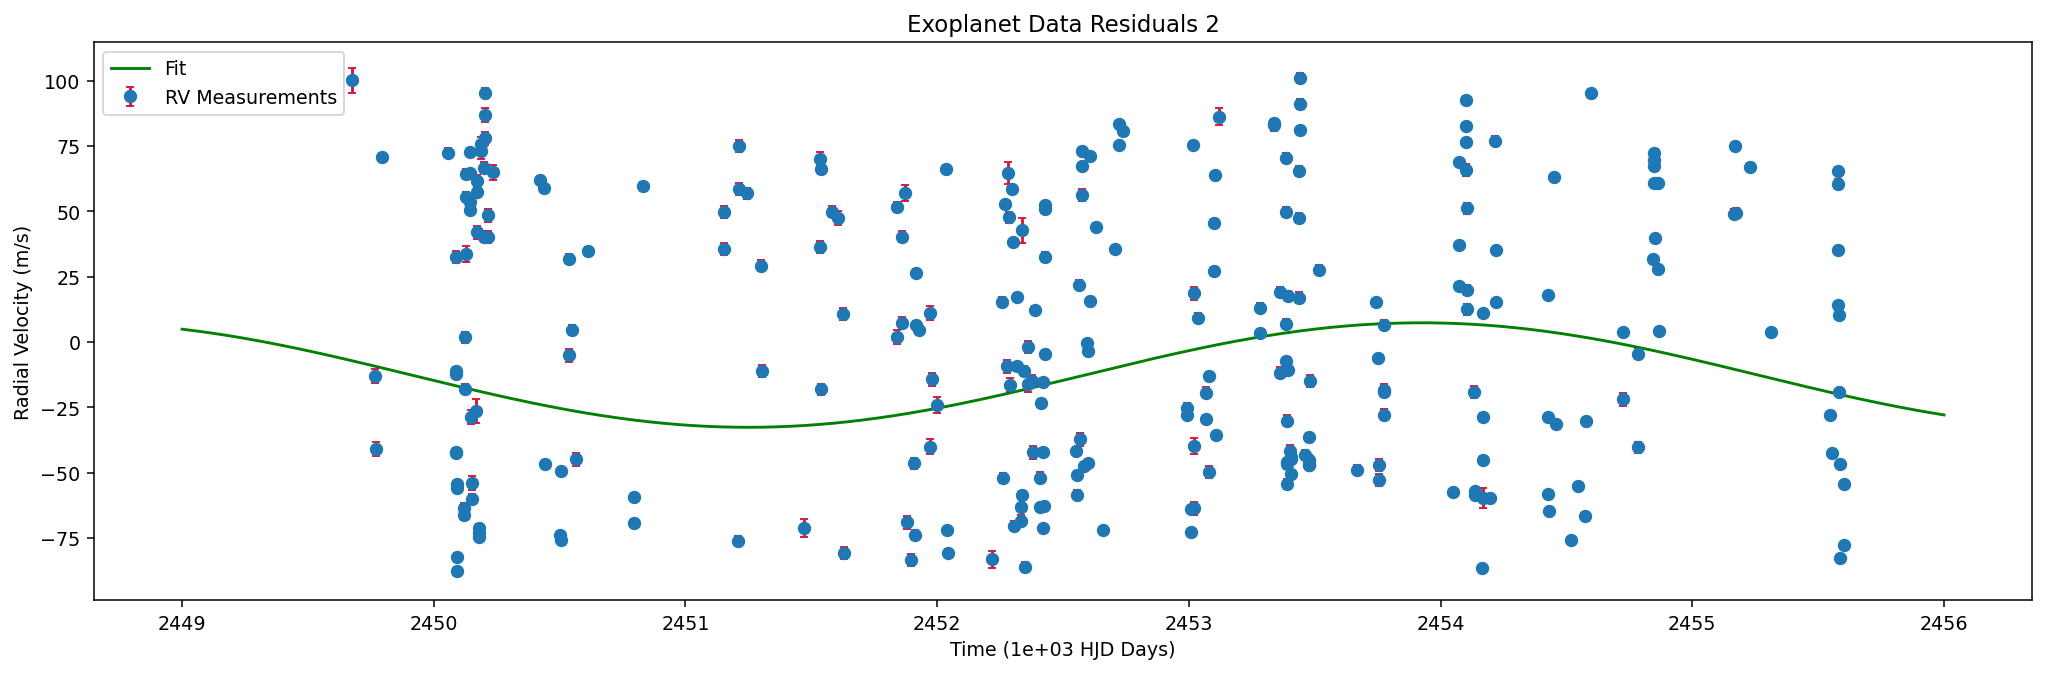

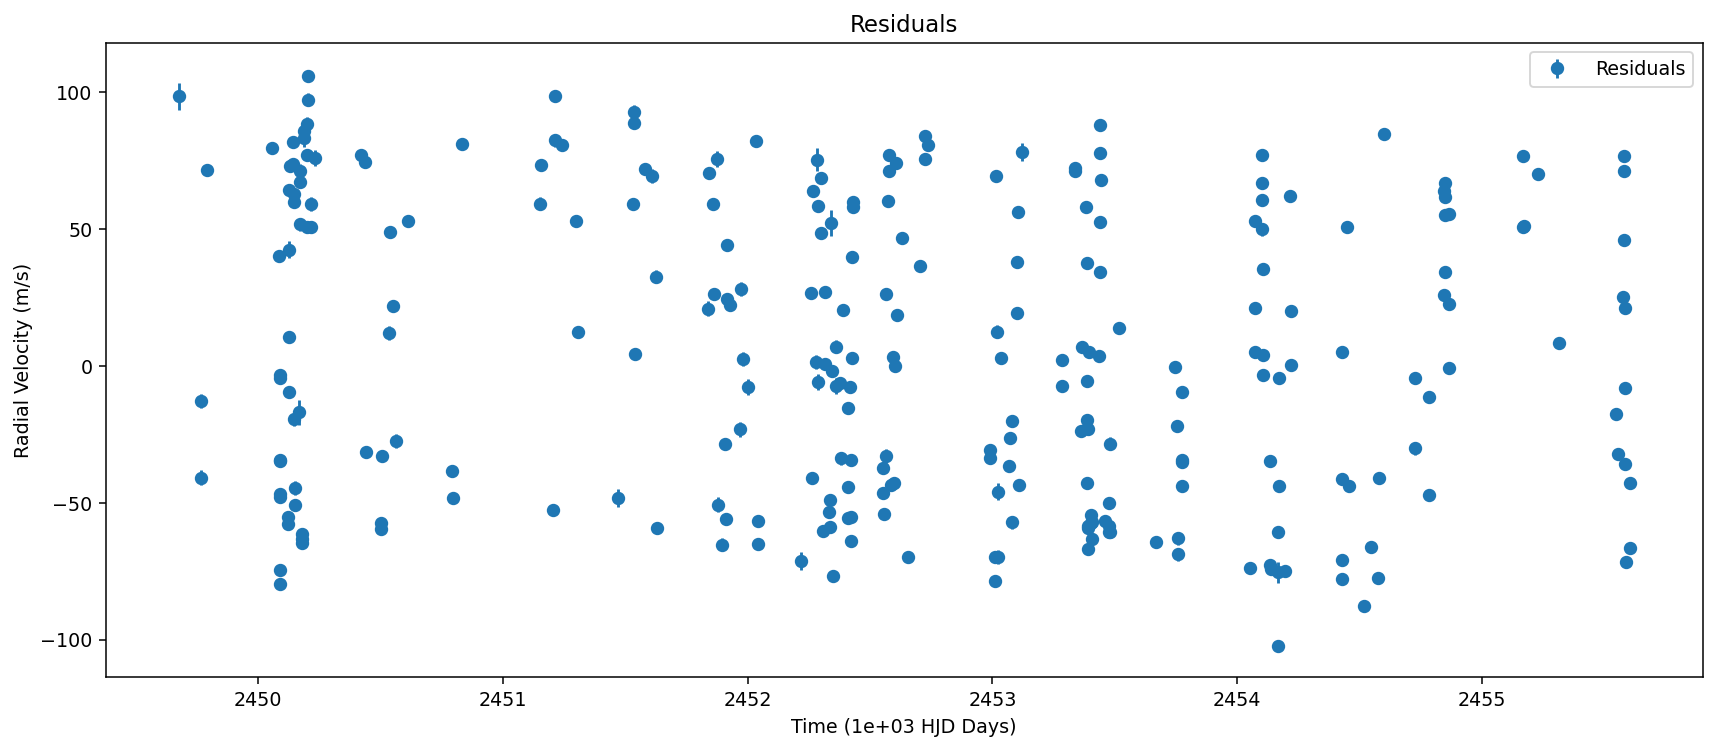

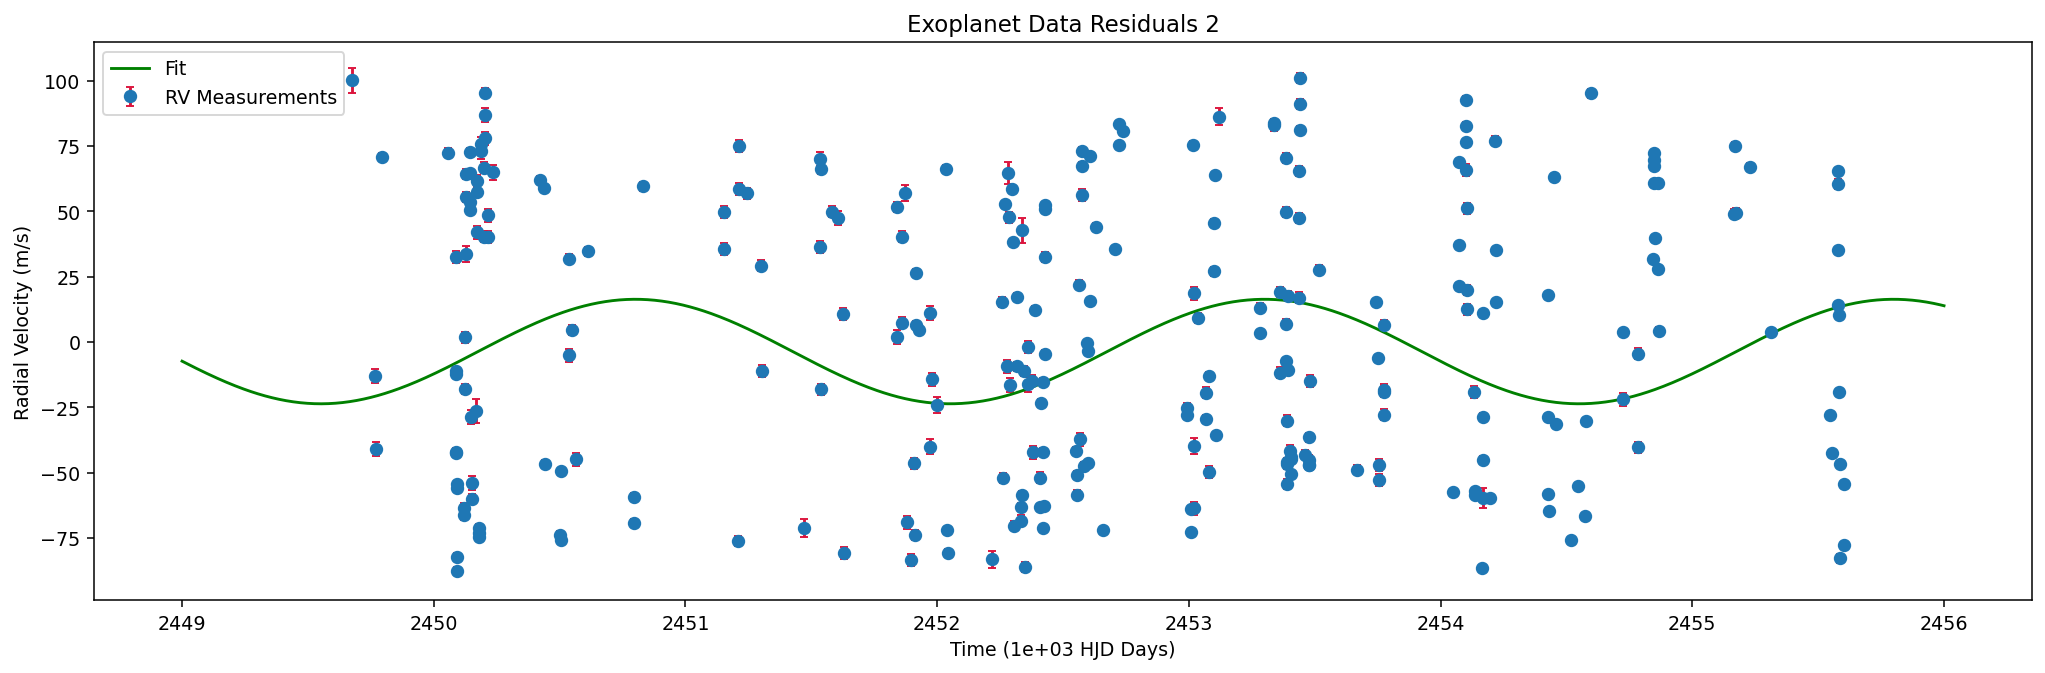

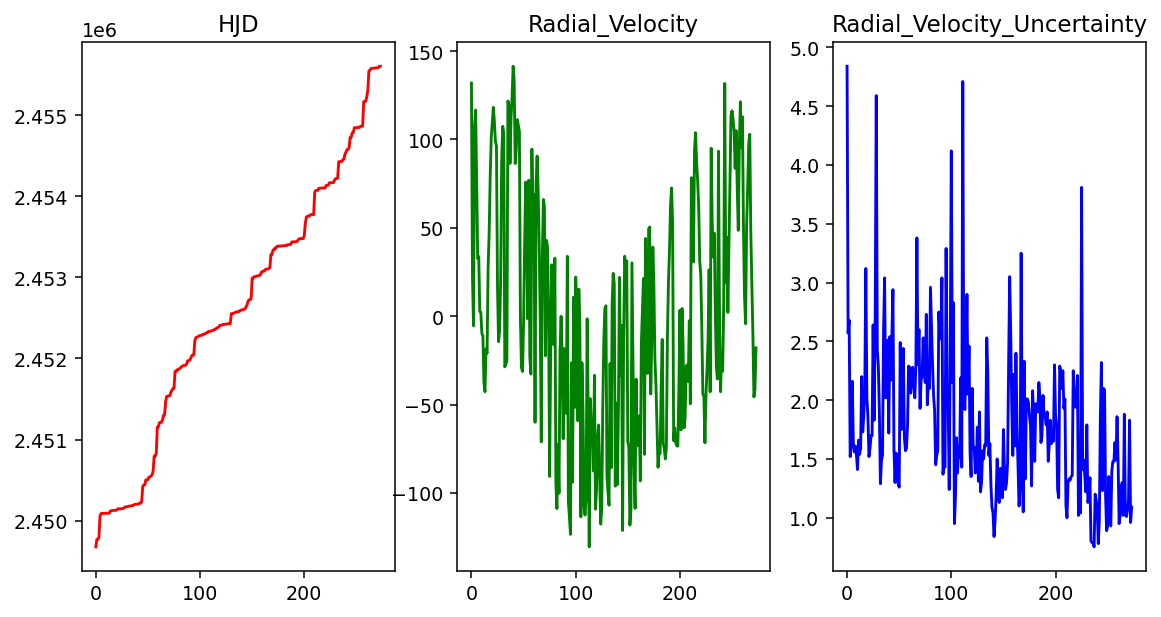

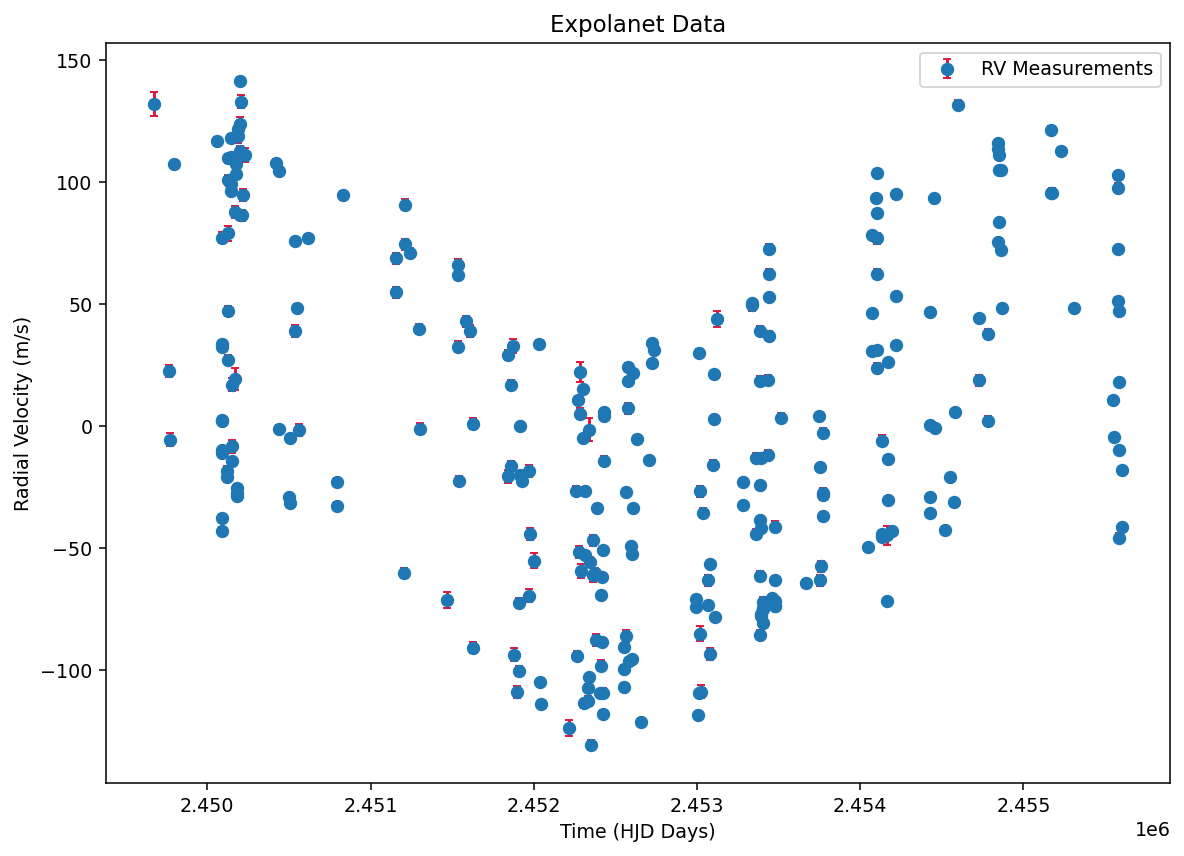

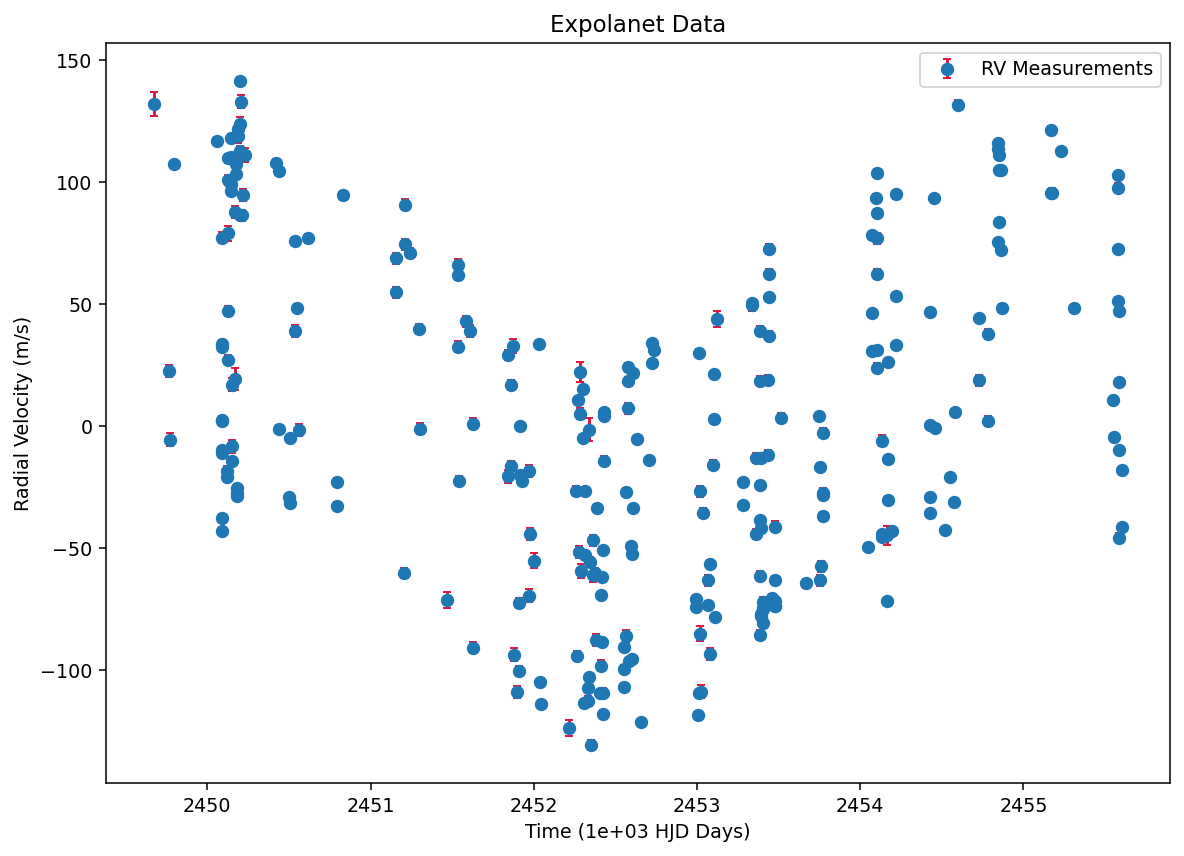

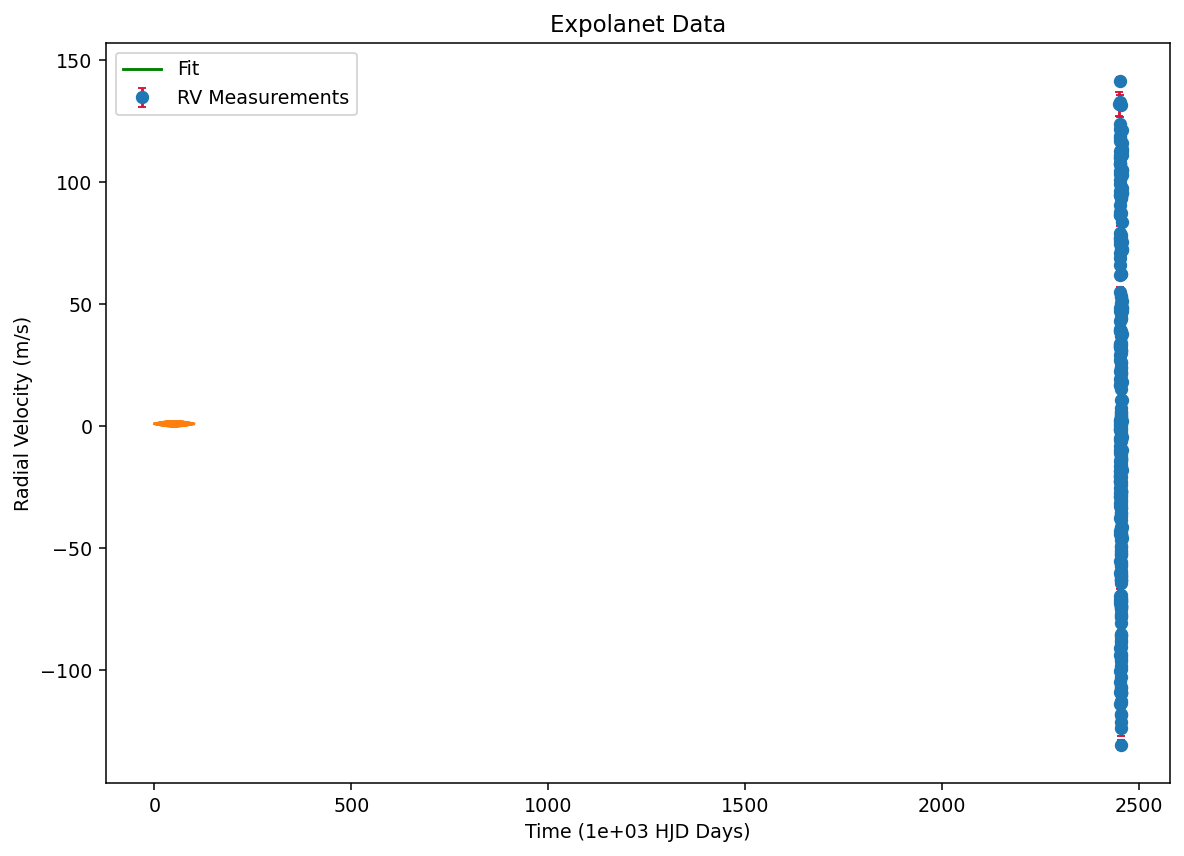

In [111]:
%matplotlib inline
x_test = np.linspace(0,100,100)
plt.plot(x_test, f_curve(x_test, 1, 50, 2, 1))
plt.show()

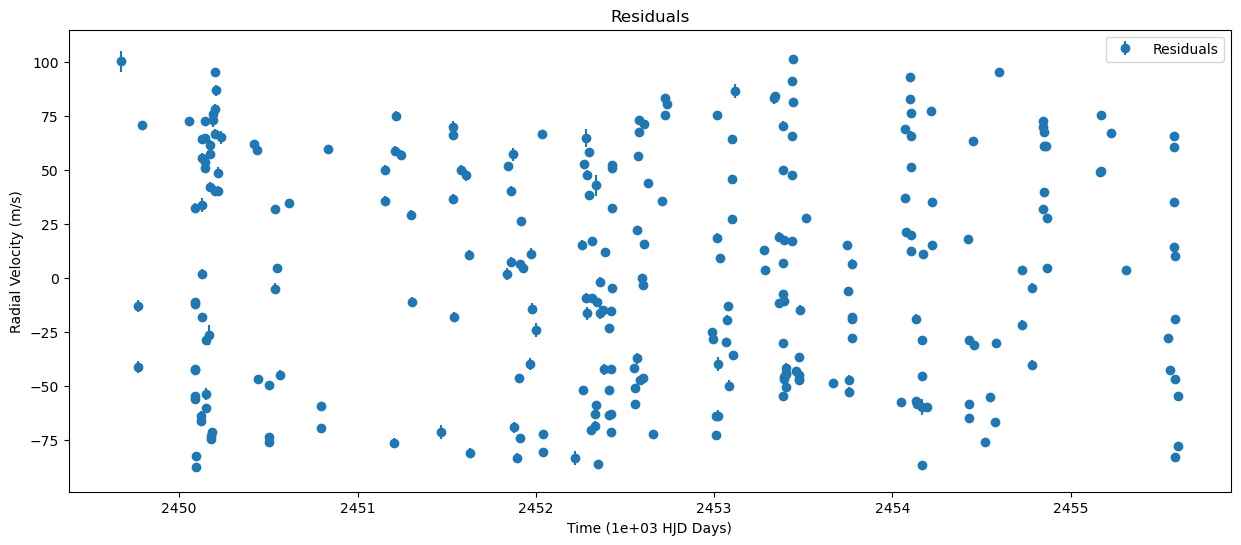

In [112]:
# calculate residuals
y_pred = f_curve(scaled_hjd, *params)
residuals = radial_velocity - y_pred

plt.figure(figsize=(15, 6))

# plot residuals
plt.errorbar(scaled_hjd, residuals, uncertainty, fmt='o', label='Residuals')

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals")
plt.legend(frameon=True,fontsize=10,handletextpad=1)

plt.show()

In [113]:
residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)
residuals_rms = np.sqrt(np.mean(residuals**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  1.8499486718105136
Residuals stdev is 52.2120803969826213
Residuals RMS is   52.2120803969826213


In [114]:
residuals1 = residuals

Fitted params: [ 20.         653.54125851   1.83402496   3.85419723]


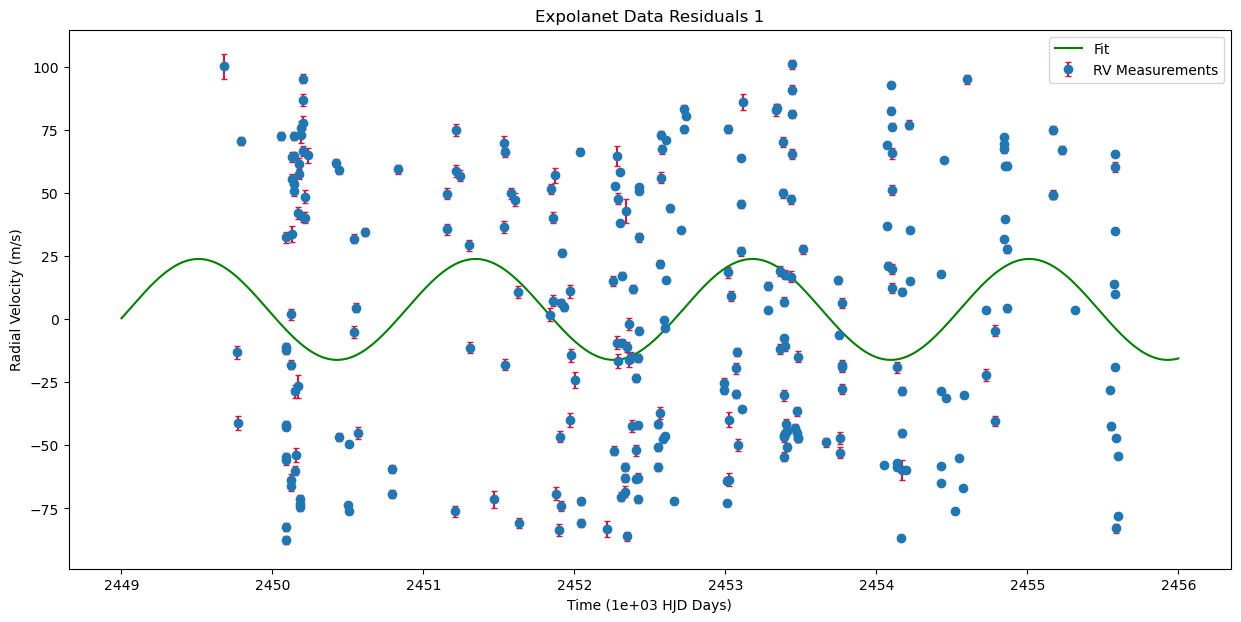

In [115]:
initial_guess = [25, 0, 2.5, 0]

lower_bound = [20, -np.inf, 0, -np.inf]
upper_bound = [30, np.inf, 10, np.inf]

#curve fit
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, residuals1, sigma = uncertainty, absolute_sigma=True,
                                        p0=initial_guess,
                                        bounds = (lower_bound, upper_bound)
                                        )
    
print(f"Fitted params: {params}")

# lets see how the best fit model looks by plotting it along with the data

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)), 1000)
y_fit = f_curve(x_fit, *params)     # providing '*params' is called unpacking and is identical to write
                                    # 'params[0], params[1], params[2]...

plt.figure(figsize=(15, 7))
plt.errorbar(x=scaled_hjd, y=residuals1, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data Residuals 1")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

1.834024963643172


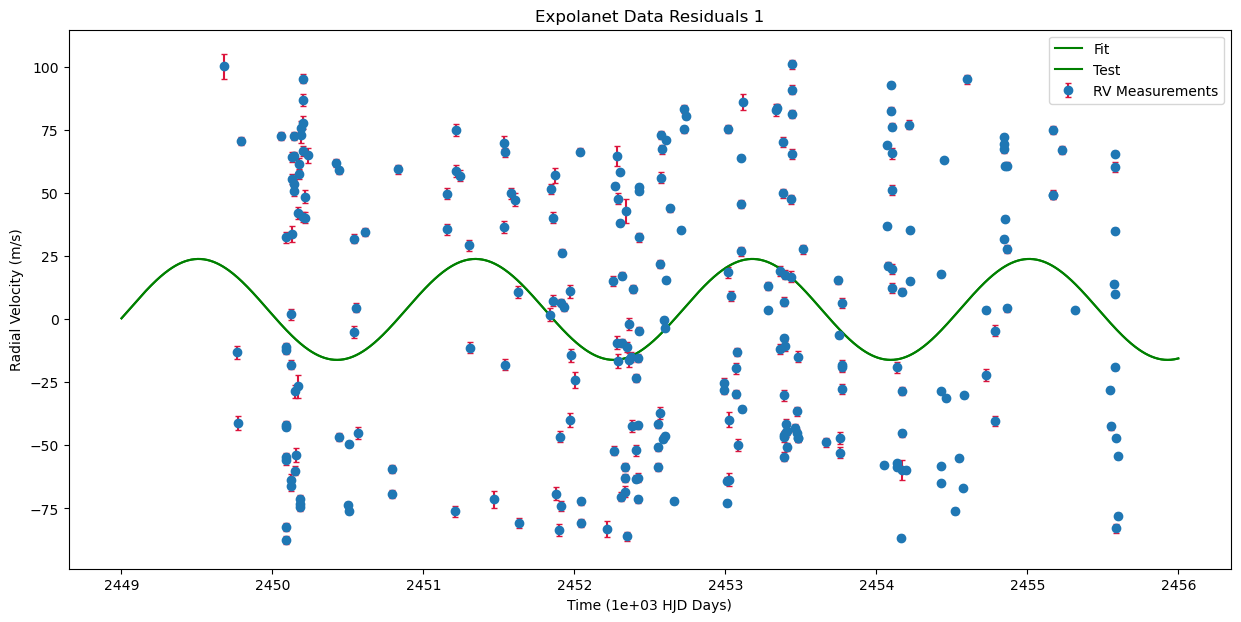

In [116]:
y_test = f_curve(x_fit, params[0], params[1], params[2], params[3])

print(params[2])

plt.figure(figsize=(15, 7))
plt.errorbar(x=scaled_hjd, y=residuals1, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.plot(x_fit, y_test, 'g-', label='Test')
plt.title("Expolanet Data Residuals 1")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

Initial params: [ 20.         653.54125851   1.83402496   3.85419723]


interactive(children=(FloatSlider(value=20.000000000000004, description='a', max=120.0, min=-80.0, step=1.0), …

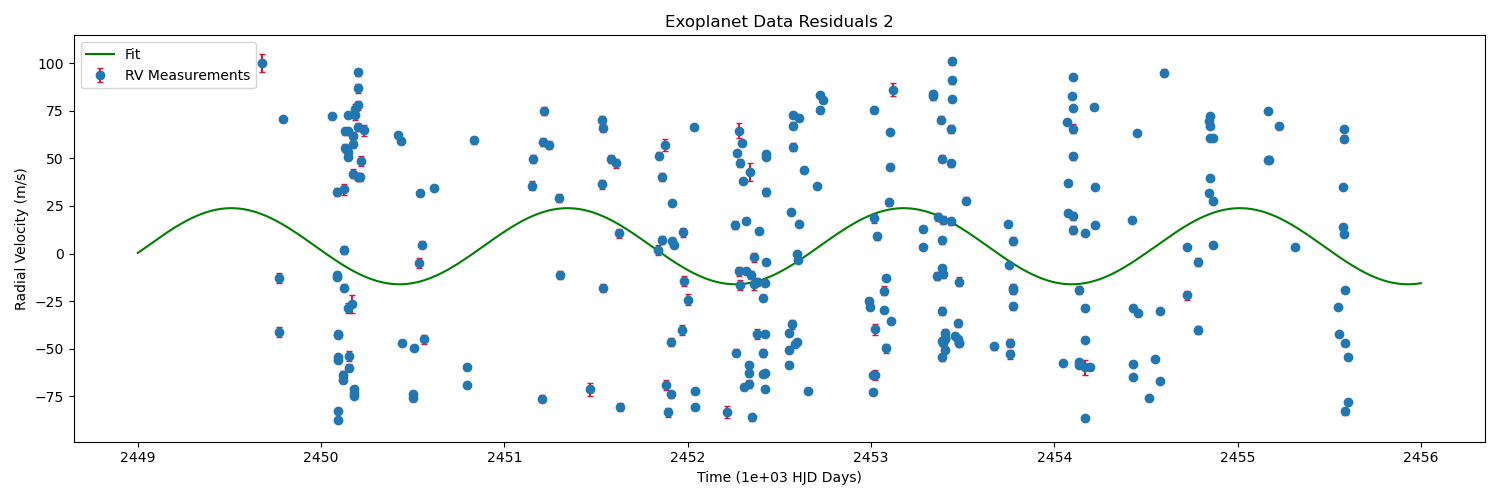

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib widget

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Initial plot
ax.errorbar(x=scaled_hjd, y=residuals1, yerr=uncertainty,
            fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")

# Initial line
line1, = ax.plot(x_fit, y_fit, 'g-', label='Fit')

ax.set_title("Exoplanet Data Residuals 2")
ax.set_xlabel(f"Time ({scalar:.0e} HJD Days)")
ax.set_ylabel("Radial Velocity (m/s)")
ax.legend(frameon=True, loc='upper left')
plt.tight_layout()

# Print the parameters (assumed to be a list or array of 4 floats)
print("Initial params:", params)

# Define the update function that takes all 4 parameters as input
def update(a, b, c, d):
    y = f_curve(x_fit, a, b, c, d)
    line1.set_data(x_fit, y)
    fig.canvas.draw_idle()

# Create sliders ±100 around each param
sliders = {
    'a': widgets.FloatSlider(value=params[0], min=params[0]-100, max=params[0]+100, step=1, description='a'),
    'b': widgets.FloatSlider(value=params[1], min=params[1]-100, max=params[1]+100, step=0.1, description='b'),
    'c': widgets.FloatSlider(value=params[2], min=params[2]-10, max=params[2]+10, step=0.01, description='c'),
    'd': widgets.FloatSlider(value=params[3], min=params[3]-100, max=params[3]+100, step=1, description='d'),
}


out = widgets.interactive(update, a=sliders['a'], b=sliders['b'], c=sliders['c'], d=sliders['d'])

# Display everything
display(out)

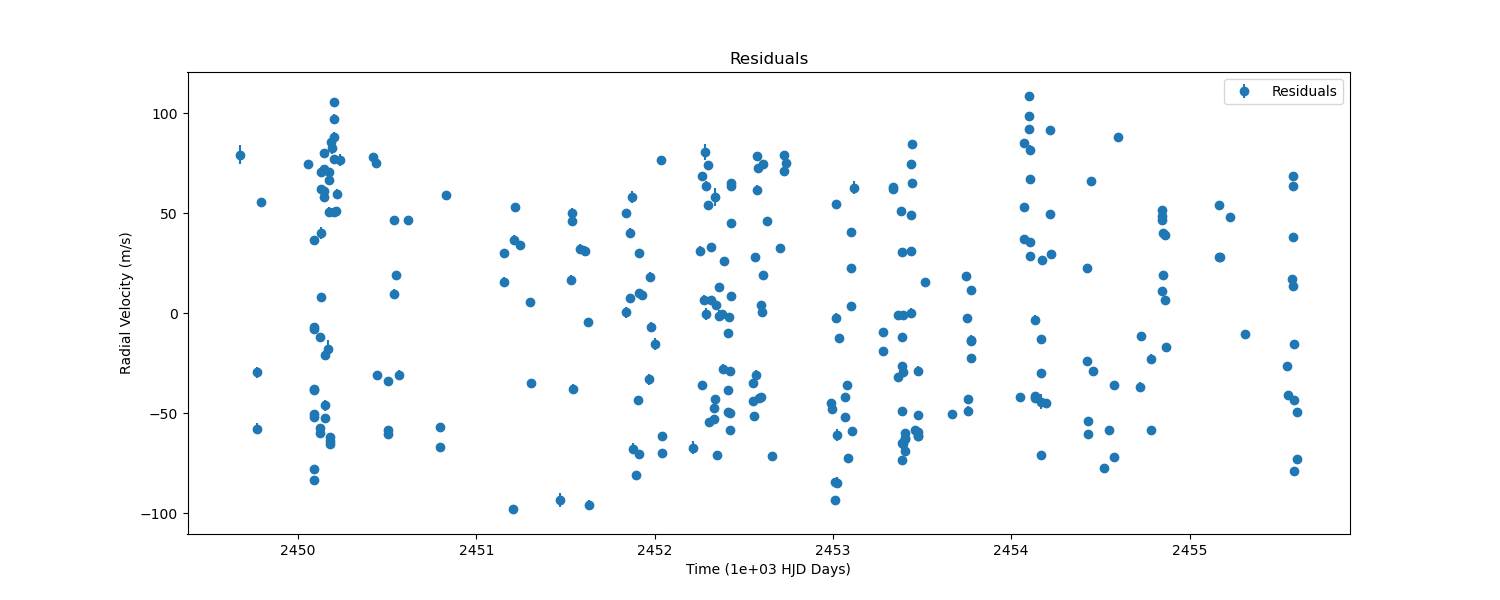

In [118]:
# calculate residual2
y_pred = f_curve(scaled_hjd, *params)
residuals2 = residuals1 - y_pred

plt.figure(figsize=(15, 6))

# plot residual2
plt.errorbar(scaled_hjd, residuals2, uncertainty, fmt='o', label='Residuals')

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals")
plt.legend(frameon=True,fontsize=10,handletextpad=1)

In [119]:
residuals_mean = np.mean(residuals2)
residuals_std = np.std(residuals2)
residuals_rms = np.sqrt(np.mean(residuals2**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  1.2734827754275402
Residuals stdev is 52.1850867778000236
Residuals RMS is   52.1850867778000236


Fitted params: [100.          10.75440221   0.99603245 -13.34697045]


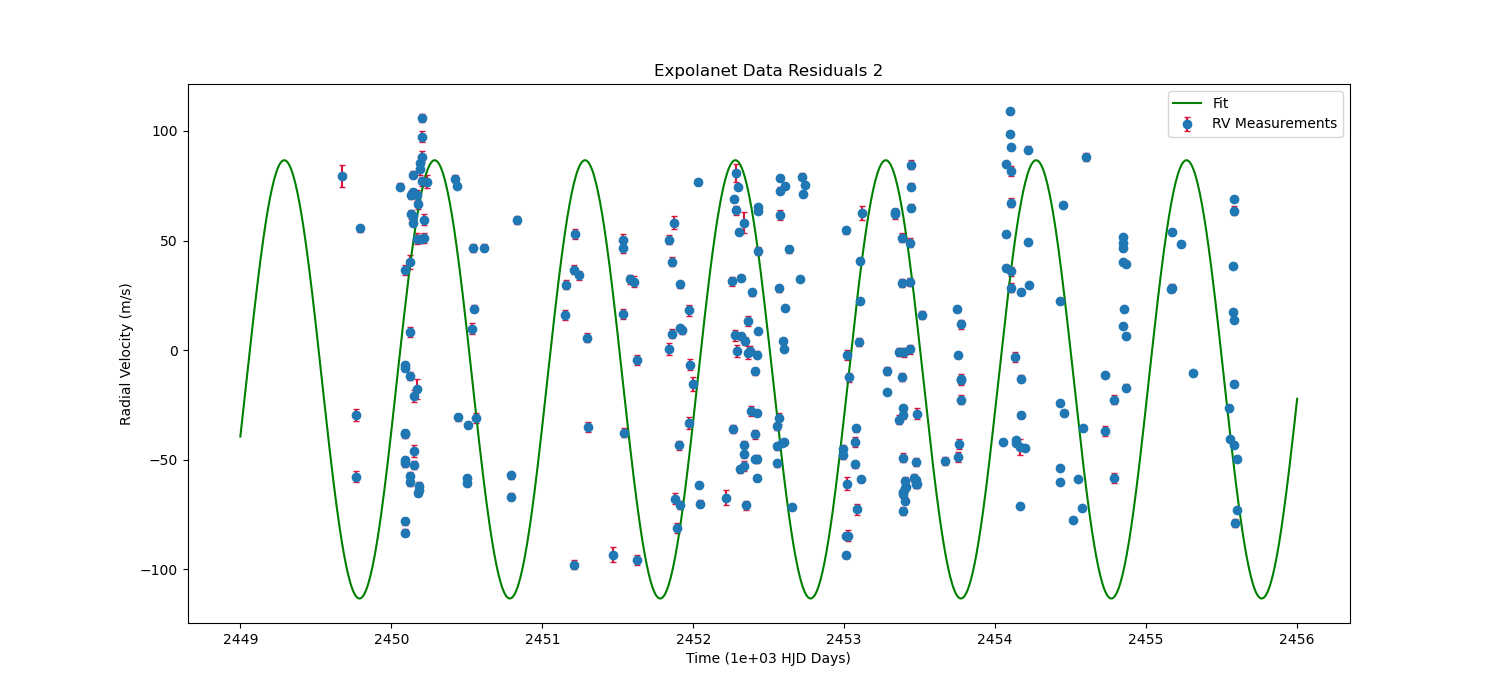

In [120]:
initial_guess = [150, 1, 1, 1]

lower_bound = [100, -np.inf, -np.inf, -np.inf]
upper_bound = [200, np.inf, np.inf, np.inf]

#curve fit
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, residuals2, sigma = uncertainty, absolute_sigma=True,
                                        p0=initial_guess,
                                        bounds = (lower_bound, upper_bound)
                                        )
    
print(f"Fitted params: {params}")

# lets see how the best fit model looks by plotting it along with the data

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)), 1000)
y_fit = f_curve(x_fit, *params)     # providing '*params' is called unpacking and is identical to write
                                    # 'params[0], params[1], params[2]...

plt.figure(figsize=(15, 7))
plt.errorbar(x=scaled_hjd, y=residuals2, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data Residuals 2")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

Initial params: [100.          10.75440221   0.99603245 -13.34697045]


Output()

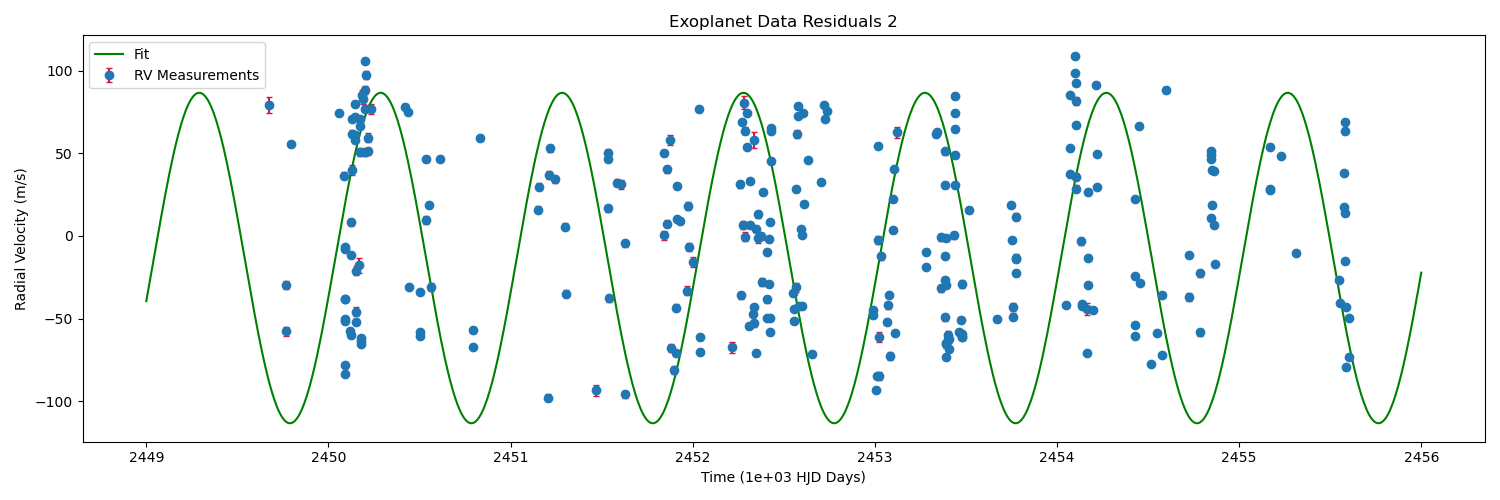

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib widget

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Initial plot
ax.errorbar(x=scaled_hjd, y=residuals1, yerr=uncertainty,
            fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")

# Initial line
line1, = ax.plot(x_fit, y_fit, 'g-', label='Fit')

ax.set_title("Exoplanet Data Residuals 2")
ax.set_xlabel(f"Time ({scalar:.0e} HJD Days)")
ax.set_ylabel("Radial Velocity (m/s)")
ax.legend(frameon=True, loc='upper left')
plt.tight_layout()

# Print the parameters (assumed to be a list or array of 4 floats)
print("Initial params:", params)

# Define the update function that takes all 4 parameters as input
def update(a, b, c, d):
    y = f_curve(x_fit, a, b, c, d)
    line1.set_data(x_fit, y)
    fig.canvas.draw_idle()

# Create sliders ±100 around each param
sliders = {
    'a': widgets.FloatSlider(value=params[0], min=params[0]-100, max=params[0]+100, step=1, description='a'),
    'b': widgets.FloatSlider(value=params[1], min=params[1]-100, max=params[1]+100, step=0.1, description='b'),
    'c': widgets.FloatSlider(value=params[2], min=params[2]-10, max=params[2]+10, step=0.01, description='c'),
    'd': widgets.FloatSlider(value=params[3], min=params[3]-100, max=params[3]+100, step=1, description='d'),
}


out = widgets.interactive(update, a=sliders['a'], b=sliders['b'], c=sliders['c'], d=sliders['d'])

# Display everything
display(out)

In [122]:
%matplotlib inline

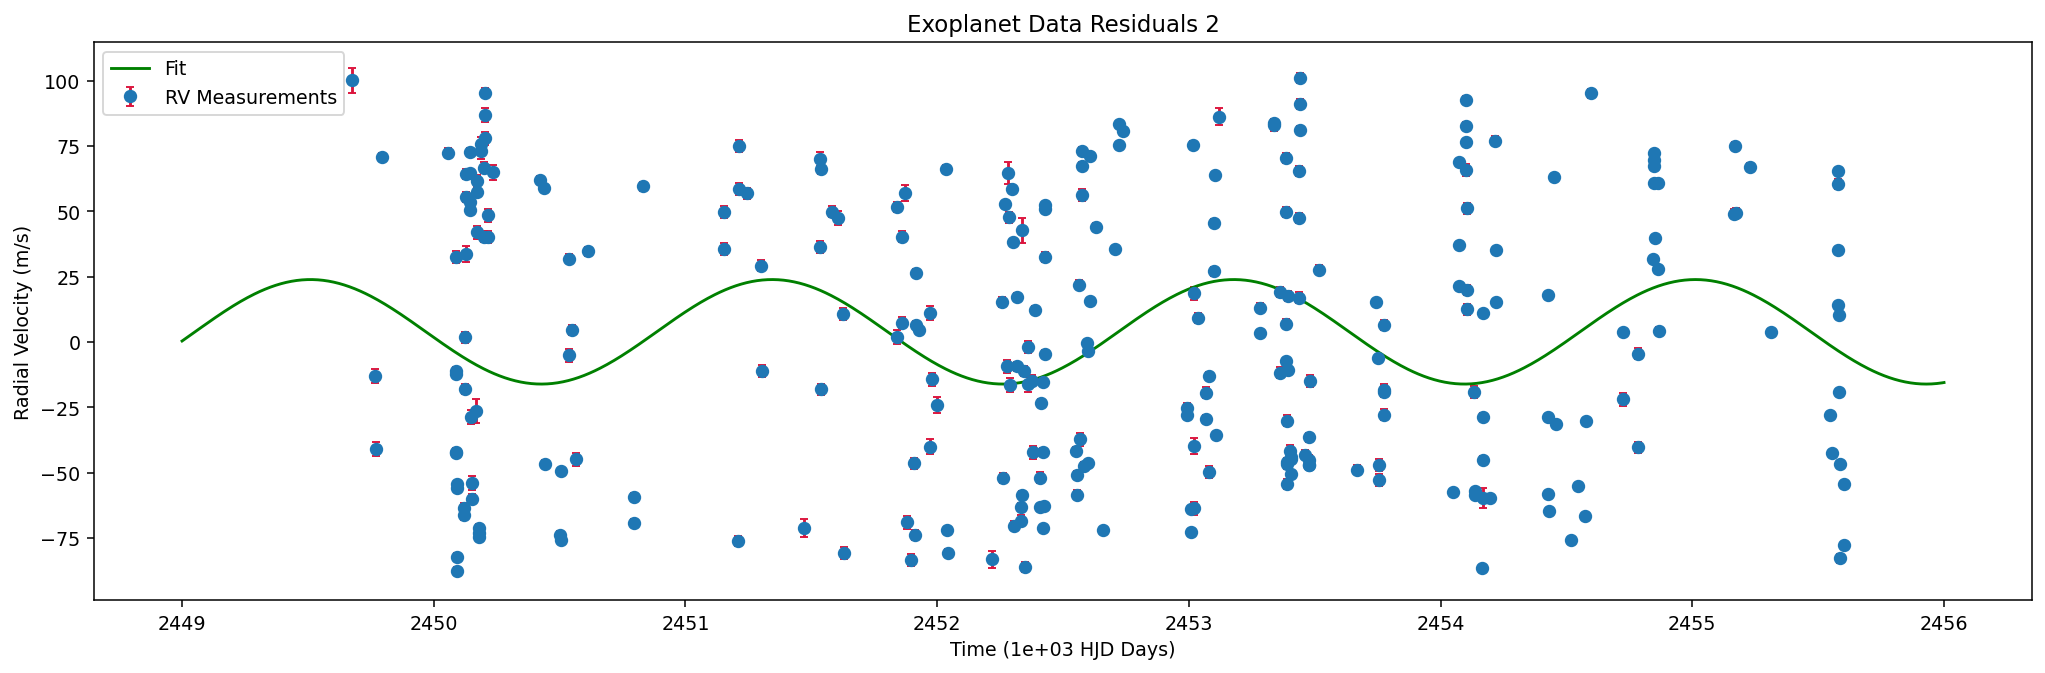

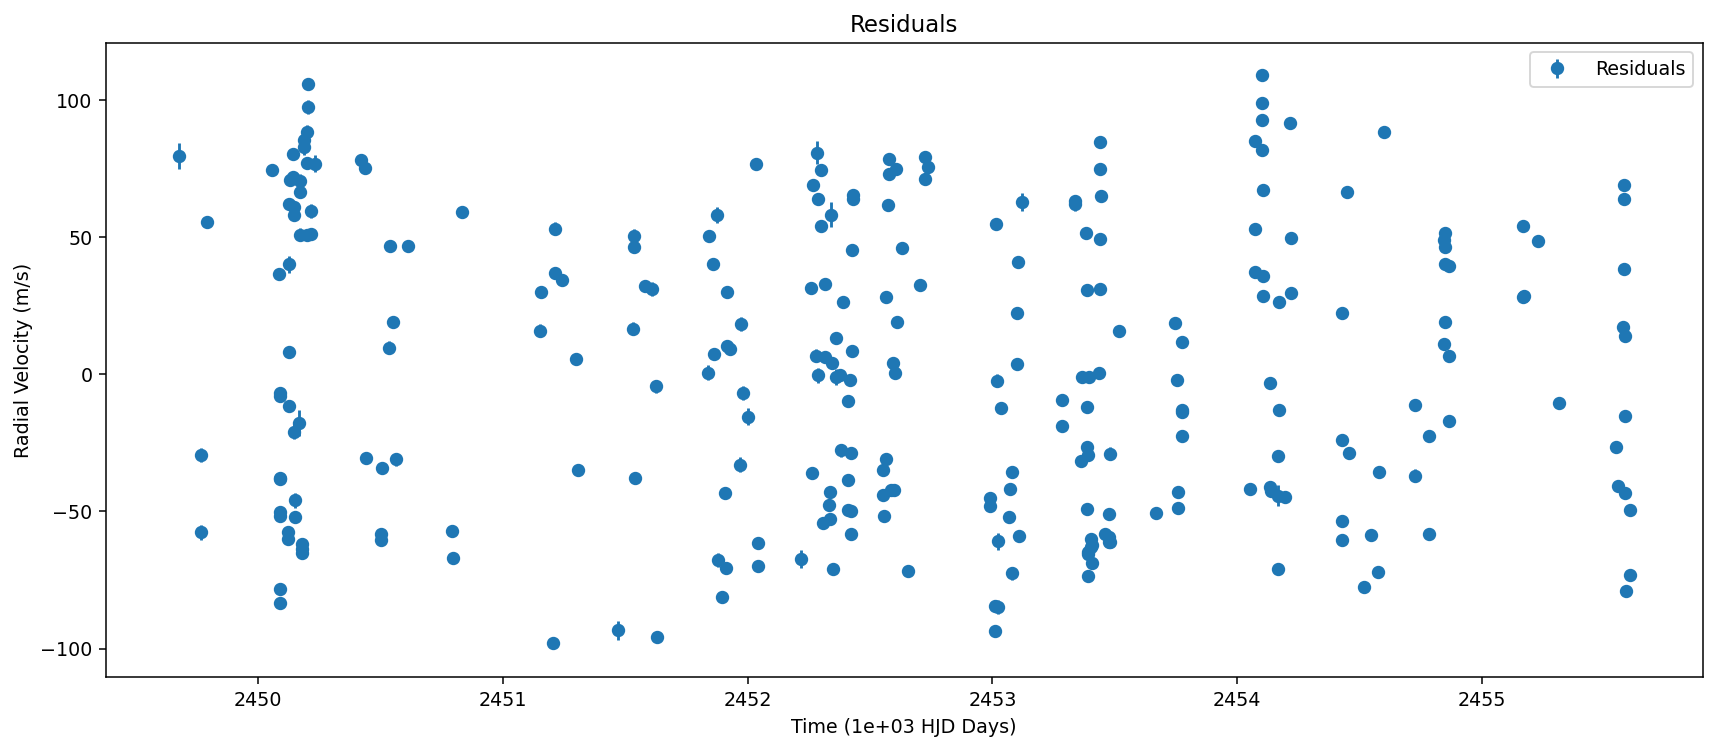

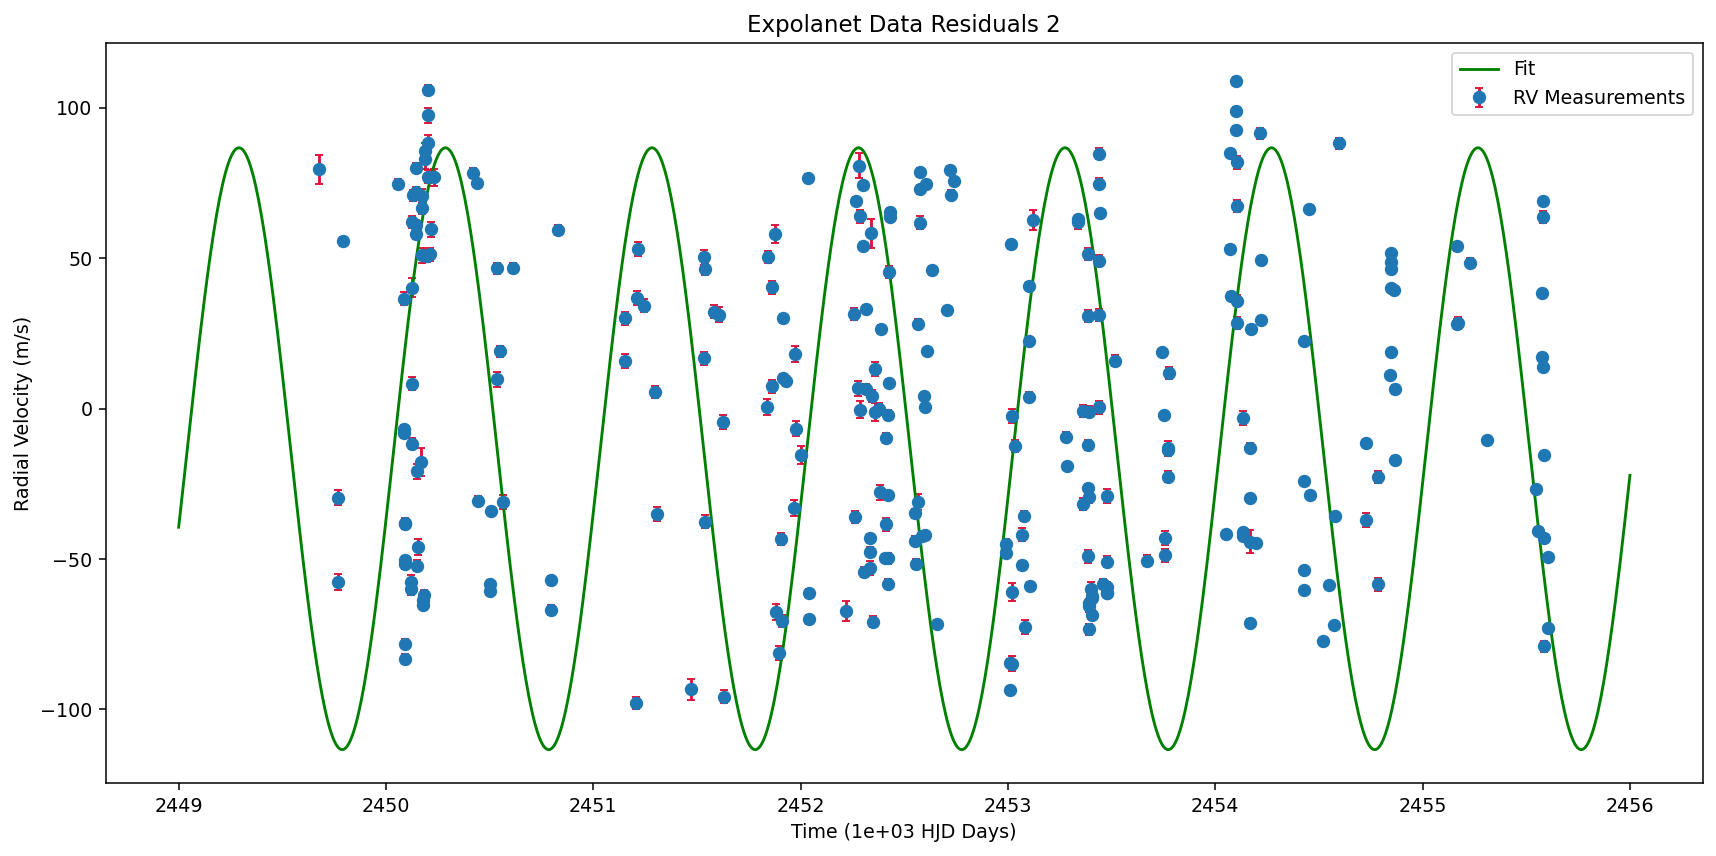

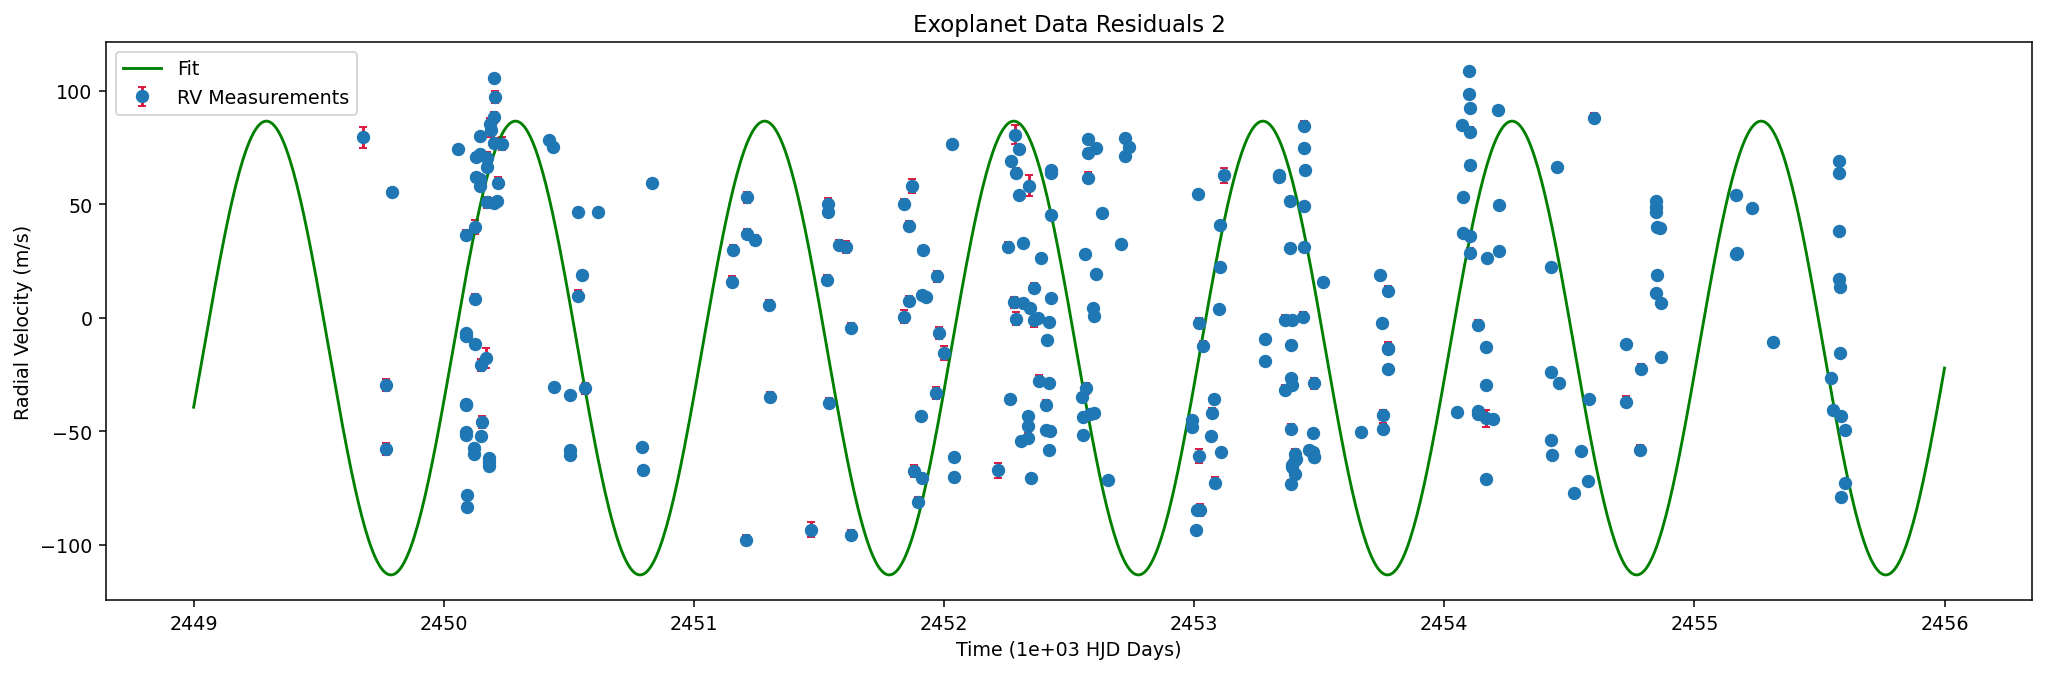

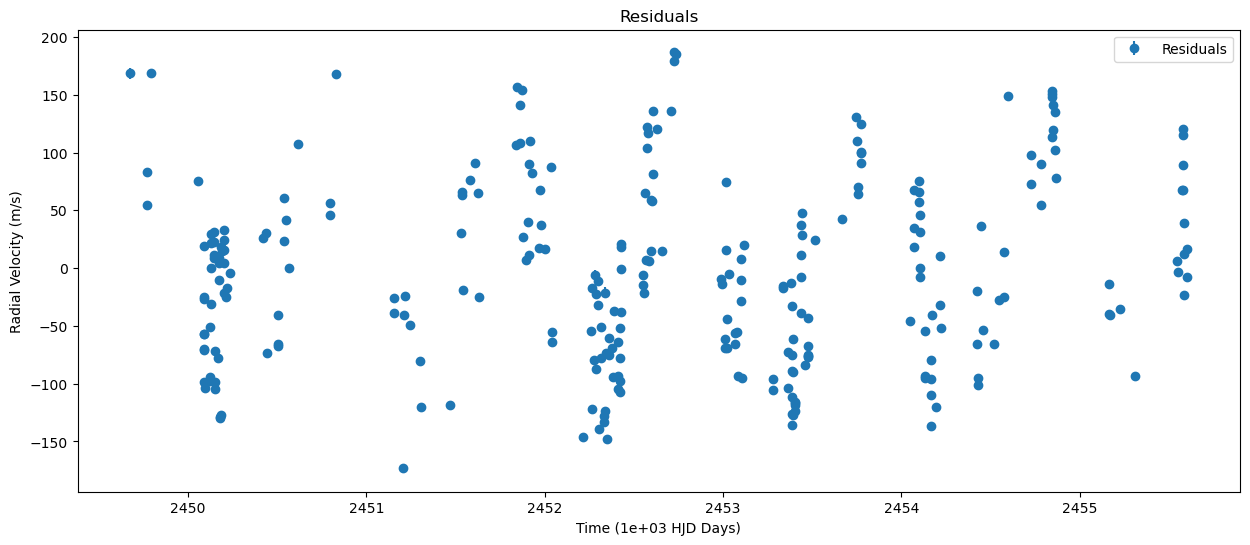

In [123]:
# calculate residual2
y_pred = f_curve(scaled_hjd, *params)
residuals3 = residuals2 - y_pred

plt.figure(figsize=(15, 6))

# plot residual2
plt.errorbar(scaled_hjd, residuals3, uncertainty, fmt='o', label='Residuals')

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals")
plt.legend(frameon=True,fontsize=10,handletextpad=1)

In [124]:
residuals_mean = np.mean(residuals3)
residuals_std = np.std(residuals3)
residuals_rms = np.sqrt(np.mean(residuals3**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  -4.9889361639813545
Residuals stdev is 79.6408166025611450
Residuals RMS is   79.6408166025611450


In [125]:
def gaussian(x,mu,s):
    return 1./np.sqrt(2.0*np.pi*s**2) * np.exp(-0.5*((x-mu)/s)**2)

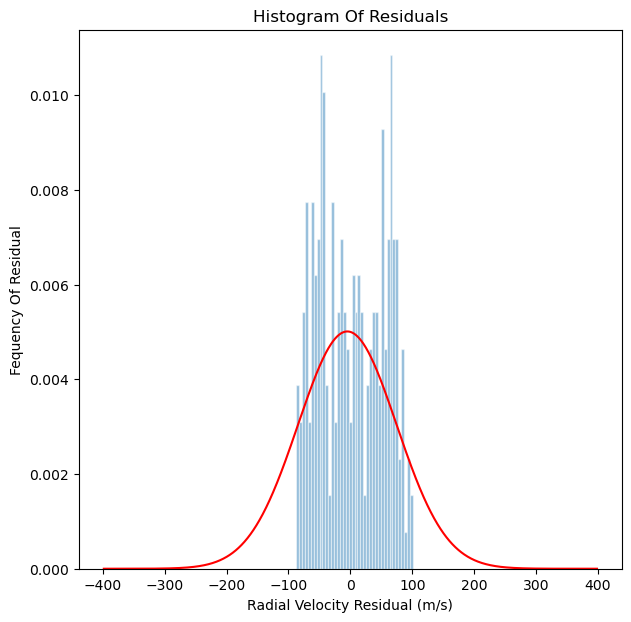

In [126]:
f,ax = plt.subplots(1,1,figsize=(7,7))

counts, bins_custom = np.histogram(residuals,bins=40)
ax.hist(residuals,bins=bins_custom,alpha=0.5,edgecolor="white",density=True)

# draw the gaussian function based on mean and stdev of residuals
x_g = np.linspace(-5*residuals_std,5*residuals_std,1000)
ax.plot(x_g,gaussian(x_g,residuals_mean,residuals_std),color="red")

ax.set_xlabel('Radial Velocity Residual (m/s)')
ax.set_ylabel('Fequency Of Residual')
ax.set_title('Histogram Of Residuals')

plt.show()

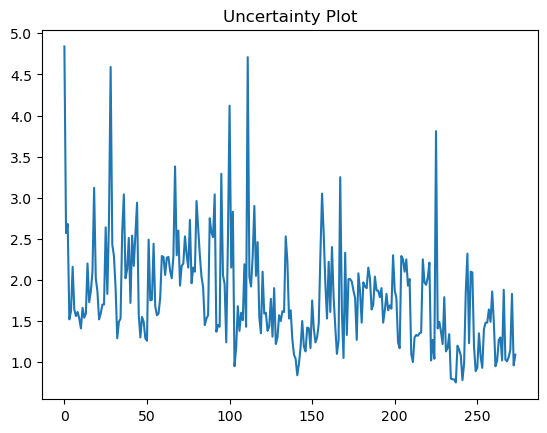

Mean Uncertainty: 1.8060667343065693
Stdev Uncertainty: 0.6427887768668138
Uncertainty RMS is   1.917043155600502


In [127]:
# calculate experimental error
plt.plot(uncertainty)
plt.title("Uncertainty Plot")
plt.show()

uncertainty_mean = np.mean(uncertainty)
uncertainty_std = np.std(uncertainty)
uncertainty_rms = np.sqrt(np.mean(uncertainty**2))

print(f"Mean Uncertainty: {uncertainty_mean}")
print(f"Stdev Uncertainty: {uncertainty_std}")
print(f"Uncertainty RMS is   {uncertainty_rms}")